<a href="https://colab.research.google.com/github/GbotemiB/Housing_Project/blob/main/150000_200000_houselangtrans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download gbotemibolarinwa/housing-lang-detect

 95% 212M/222M [00:08<00:00, 41.3MB/s]
100% 222M/222M [00:08<00:00, 28.3MB/s]


In [ ]:
!unzip housing-lang-detect.zip

Archive:  housing-lang-detect.zip
  inflating: housing_lang.csv        


In [ ]:
#!pip install openpyxl

In [ ]:
data = pd.read_csv('housing_lang.csv')

In [ ]:
data.head()


,Unnamed: 0,adAvailableDate,adDescription,adLangDetected
0,0,not available,Appartement avec beaucoup de charme à louer à ...,fr
1,1,nach Vereinbarung,Die Highlights:<br />» Gut geschnittener Büror...,de
2,2,sofort,Für diese Wohnung suchen wir ein nettes Paar (...,de
3,3,sofort,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it
4,4,sofort,"Attico mansardato, posto in elegante palazzina...",it


In [ ]:
data.rename(columns = {'Unnamed: 0':'id'}, inplace=True)

In [ ]:
data.head()

,id,adAvailableDate,adDescription,adLangDetected
0,0,not available,Appartement avec beaucoup de charme à louer à ...,fr
1,1,nach Vereinbarung,Die Highlights:<br />» Gut geschnittener Büror...,de
2,2,sofort,Für diese Wohnung suchen wir ein nettes Paar (...,de
3,3,sofort,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it
4,4,sofort,"Attico mansardato, posto in elegante palazzina...",it


In [ ]:
#there seems to be some missing values 
data.isnull().sum()

id                     0
adAvailableDate    19645
adDescription      28001
adLangDetected     28913
dtype: int64

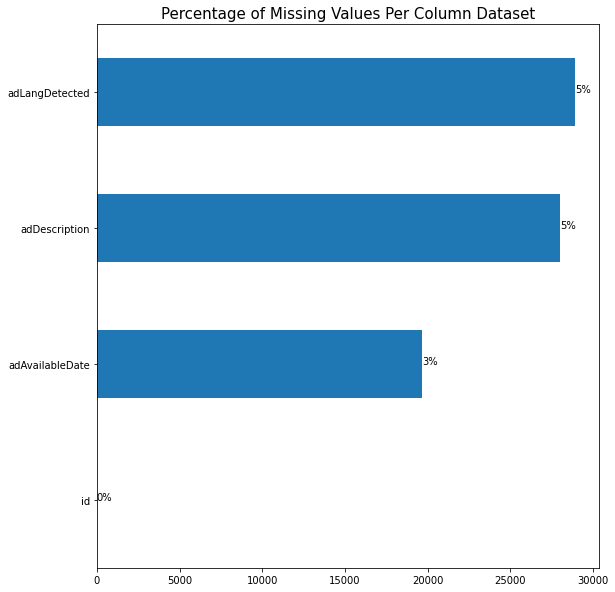

In [ ]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
data.columns

Index(['id', 'adAvailableDate', 'adDescription', 'adLangDetected'], dtype='object')

In [ ]:
langDetected, Description, AvailableData = data['adAvailableDate'], data['adDescription'], data['adLangDetected']

In [ ]:
len(Description)

606948

In [ ]:
data.isna().sum().sort_values(ascending=False)

adLangDetected     28913
adDescription      28001
adAvailableDate    19645
id                     0
dtype: int64

In [ ]:
data['adDescription'][58]

'None'

In [ ]:
data['adDescription'] = data['adDescription'].replace('None', np.nan)

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:

"""data['adDescription'] = data['adDescription'].replace('<br />', ' ')
data['adDescription'] = data['adDescription'].replace('<h3>', ' ')
data['adDescription'] = data['adDescription'].replace('</h3>',' ')
data['adDescription'] = data['adDescription'].replace('</p>', ' ')
data['adDescription'] = data['adDescription'].replace('<p>', ' ')
data['adDescription'] = data['adDescription'].replace('<strong>', ' ')
data['adDescription'] = data['adDescription'].replace('</trong>', ' ')"""

"data['adDescription'] = data['adDescription'].replace('<br />', ' ')\ndata['adDescription'] = data['adDescription'].replace('<h3>', ' ')\ndata['adDescription'] = data['adDescription'].replace('</h3>',' ')\ndata['adDescription'] = data['adDescription'].replace('</p>', ' ')\ndata['adDescription'] = data['adDescription'].replace('<p>', ' ')\ndata['adDescription'] = data['adDescription'].replace('<strong>', ' ')\ndata['adDescription'] = data['adDescription'].replace('</trong>', ' ')"

In [ ]:
import re

CLEANR = re.compile('<.*?>')

def cleanhtml(rawhtml):
    cleantext = re.sub(CLEANR, '', rawhtml)
    cleantext = re.sub(r'http\S+', '', cleantext)
    return cleantext
    

In [ ]:
x = data['adDescription'][71]
x

'Une place de parc intérieure dans un parking souterrain pour un loyer mensuel de Fr. 120.00.<br /><br/>Disponible de suite.'

In [ ]:
cleanhtml(x)

'Une place de parc intérieure dans un parking souterrain pour un loyer mensuel de Fr. 120.00.Disponible de suite.'

In [ ]:
type(data['adDescription'][1])

str

In [ ]:
data['adDescription'] = data['adDescription'].apply(lambda x: cleanhtml(x))

In [ ]:
data['adDescription'][71]

'Une place de parc intérieure dans un parking souterrain pour un loyer mensuel de Fr. 120.00.Disponible de suite.'

In [ ]:
#TODO
#resolve how to handle missing data

In [ ]:
languages = list(data['adLangDetected'].unique())
languages

['fr', 'de', 'it', 'en']

In [ ]:
#languages.pop(4)


In [ ]:
languages

['fr', 'de', 'it', 'en']

In [ ]:
#drop missing data
#data.dropna(axis=0, inplace=True)

In [ ]:
data.shape

(562393, 4)

# Installing library for detecting language

In [ ]:
#!pip install langdetect

## Google api for translating 

In [ ]:
data['transDescription'] = 0

In [ ]:
data['adDescription'][:5]

0    Appartement avec beaucoup de charme à louer à ...
1    Die Highlights:» Gut geschnittener Büroraum in...
2    Für diese Wohnung suchen wir ein nettes Paar (...
3    ChiassoSi affitta in pieno a centro a Chiasso,...
4    Attico mansardato, posto in elegante palazzina...
Name: adDescription, dtype: object

In [ ]:
!pip install -U deep-translator

     |████████████████████████████████| 97 kB 2.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from deep_translator import GoogleTranslator
#translated = GoogleTranslator(source=y, target='en')
#translate = translated.translate(x)
#translate

In [ ]:
late = GoogleTranslator(source='auto', target='en')

In [ ]:
def translate(text):
    trans = GoogleTranslator(source='auto', target='en').translate(text)
    return trans

In [ ]:
translate(x)

'An indoor parking space in an underground car park for a monthly rent of Fr. 120.00.<br /><br/>Available immediately.'

In [ ]:
#data.reset_index(drop=True, inplace=True)

In [ ]:
data['adDescription'][463:]

463       Belle surface commerciale d'environ 57m2 situé...
464       Bellissimo Appartamento 2.5 locali ultimo pian...
465       Immeuble situé à deux pas de la gare CFF et du...
466       In Otelfingen vermieten wir an ruhiger Lage pe...
467       LageDornacherstrasse - Altbauträume werden wah...
                                ...                        
562388    MinusioAffittiamo in Casa Francesca a Minusio ...
562389    La société Shifters déménage, besoin de plus d...
562390    L'appartement se situe au centre de la commune...
562391    Avec un grand potentiel - lumineux avec un emp...
562392    Die Wohnung verfügt über eine offene Küche mit...
Name: adDescription, Length: 561930, dtype: object

In [ ]:
(data['adDescription'][1])

'Die Highlights:» Gut geschnittener Büroraum in einer gepflegten Liegenschaft» Ansprechende Büroraum mit 145 m2 » WC-Anlage zur Mitbenutzung » Verkehrsgünstige Lage » Hervorragender Anschluss an den öffentlichen VerkehrDie zusätzlichen Möglichkeiten:» Einstellplätze (à CHF 180.00 pro Monat)Die Lage:Die Liegenschaft befindet sich im Kreis 7 in Zürich und bietet Ihnen alle Annehmlichkeiten einer Grossstadt. Hervorzuheben sind die vielfältigen kulturellen Einrichtungen und die Möglichkeit, zahlreichen Freizeitaktivitäten nachzugehen. Die Infrastruktur:In unmittelbarer Nähe befinden sich Einkaufsmöglichkeiten (Denner, Coop, etc.), Restaurants, Detailhändler und das Schulhaus Langmatt (Primarschule & Kindergarten). Zum Zürichsee sind es weniger als 2.5 km.Die Verkehrsanbindung:Direkt vor der Türe finden Sie eine Bushaltestelle. Mit der Tram 11 gelangen Sie von der Haltestelle Balgrist rasch in das Zentrum von Zürich. Der nächste Autobahnanschluss auf die A52 ist circa 4 km entfernt. Zum Flu

In [ ]:
x, y = data['adDescription'][59], data['adLangDetected'][59]
x, y

('Appartement dans immeuble récent dans quartier calme. A 2 minutes a pieds de la gare et 5 du centre ville. 1 parking sous-terrains inclus.2 grands balcons. Cuisine ouverte tout équipée. Salon et séparé pour table a mangéSalle de bain équipée de baignoire et douche. Armoires murales. 2 chambres avec accès aux balcons.Cave privée. Buanderie et réduit a vélo communautaire.',
 'fr')

In [ ]:
translate(x)

'Apartment in a recent building in a quiet area. 2 minutes walk from the train station and 5 from the city center. 1 underground parking included. 2 large balconies. Fully equipped open kitchen. Living room and separate dining tableBathroom with bath and shower. Wall cabinets. 2 bedrooms with access to balconies. Private cellar. Laundry room and community bike store.'

In [ ]:
data['transDescription'] = str('null')

In [ ]:
data['transDescription']

0         null
1         null
2         null
3         null
4         null
          ... 
562388    null
562389    null
562390    null
562391    null
562392    null
Name: transDescription, Length: 562393, dtype: object

In [ ]:
data.loc[data['id'] == str(1)]

,id,adAvailableDate,adDescription,adLangDetected,transDescription
1,1,nach Vereinbarung,Die Highlights:» Gut geschnittener Büroraum in...,de,null


In [ ]:
for i in range(4,10):
  print(i)

4
5
6
7
8
9


In [ ]:
data.loc[data['id'] == '135378']

,id,adAvailableDate,adDescription,adLangDetected,transDescription
130682,135378,01.07.2021,Moderne 4.5-Zimmer-Wohnung mit grosszügigem Ba...,de,null


In [ ]:
translate(data['adDescription'].loc[100010])

'We are renting this gently renovated 3.5-room apartment as of April 1st, 2021 or by arrangement with the following advantages: new painting of the entire apartment in 2021, open living and dining area, separate kitchen without dishwasher, bathroom with bathtub, parquet flooring in the rooms, tiles were laid in the kitchen and bathroom, built-in cupboards, balcony, seating area in general Shared use of a cellar compartmentLaundry room for general useAn underground parking space can be rented for CHF 100.00/month. The Fischermätteli tram terminus can also be reached in a few minutes on foot. Have we aroused your interest? Give us a call - we would be happy to arrange a non-binding visit for you.'

In [ ]:
for i in range(150000, 200000):
  data['transDescription'][i] = translate(data['adDescription'][i][:4999])
  print(i, data['transDescription'][i])

  data.loc[[i]].to_csv('drive/MyDrive/trans_150000.csv', mode='a', index=False, header=False)

130683 The building land is located in a sunny and easily accessible position. It has an area of ​​2,319 square meters in the R3 residential area. The master plan provides for an exploitation index of 0.4 and an occupancy index of 35%. It is ideal for the construction of a three-storey multi-family building and also for single-family homes.
130684 apartment on the 1st floor of a small building with 5 apartments.balcony3 bedroomsbathroom with bath and showerseparate toiletcovered carcellar and attic
130685 We are renting a beautiful, spacious 4.5 room apartment at Waldhofstrasse 9a, 4900 Langenthal, immediately or by arrangement. Here you have enough space for you or your large family three bedrooms.The bright, modern bathroom is also part of it.Outside has a large garden to linger in.Garage boxes or parking spaces can be rented.Are you interested?Do not hesitate to contact us...
130686 Location- motorway access: approx. m- kindergarten: approx. 700 m- shops: approx. 250 m- public trans

In [ ]:
stop

In [ ]:
data.loc[[100002]]

In [ ]:
his = 'Sitzplatz 1Estrich 1Carport 2Aussenstellplätze 4Stall PferdestallAnzahl 6 PferdeAnzahl 6 PonyWirtschaftsraum für FuttermittelSattekammerReitplatz 33 mx18 m mit / Stall Auf AnfrageGrundstücksfläche 10998 m² * Auf Anfrage (Ackerland)PACHTGrundstücksfläche'

In [ ]:
his[:5]

In [ ]:
len(str('Sind Sie auf der Suche nach einer Liegenschaft, in welcher Sie komfortabel Wohnen, Arbeiten und Ihr Hobby kombinieren können?Ist Ihnen eine sonnige und ruhige Lage wichtig?Dann könnte dieses stattliche Einfamilienhaus mit separatem Pferdestallgebäude bald Ihr neues Zuhause sein auf einer Grundstücksfläche von 6'004 m2.Die grosszügig, offen und mit fliessenden Übergängen konzipierte Wohnliegenschaft besticht durch ein geräumiges, gut durchdachtes und zeitgemässes Grundrisskonzept mit einigen Extras.Das Entrée zum 6½ Zimmer Einfamilienhaus befindet sich Parterre. Dieses beinhaltet eine bestens ausgestattete, grosse Küche mit Granitabdeckung, ein offener Essplatz mit angrenzendem Wohnbereich mit schönem Schwedenofen für gemütliche Stunden an nassen Tagen.Auf einer Wohnfläche von 230 m2, die sich auf zwei Etagen und 6½ Zimmer verteilt, schaffen hohe Decken und Dachschrägen, helle Materialien und viel Licht ein leichtes, aber warmes Ambiente.Fenstertüren bei Küche und Wohnraum öffnen den überdachten Sitzplatz und das Gartenreich, wo Ihnen dank optimaler Ausrichtung Sonnenschein bis in die Abendstunden sicher ist.Ein zusätzliches Zimmer im Erdgeschoss gewähren Ruhe und persönlichen Rückzug. Ein Wirtschaftsraum, Technikraum und ein Badezimmer mit Dusche, Lavabo und WC sind praktisch angeordnet.Über eine massive Holztreppe gelangen Sie ins Obergeschoss. Hier befinden sich vier Zimmer, Badezimmer mit Tageslicht Badewanne/Dusche. Ein weiterer Wirtschaftsraum und Zugang zum isolierten Estrich mit Dachschrägen sind im 1. OG untergebracht.Mittels separatem aussen Eingang gelangt man in einen weiteren Wirtschaftsraum mit Dusche, Lavabo und WC.Der angebaute Carport bietet Platz für 2 Autos und beinhaltet den gedeckten Eingang.Stallungen6 Auslauf-Boxen (14m2) mit direktem Zugang zur Wiese1 Freilaufstall für 6 Ponys mit direktem Zugang zur WieseStauraum für Futtermittel1 Sattelkammer1 beleuchtbaren Reitplatz (33m x 18m)1,1ha AckerlandDie 100 m entfernten Wald- und Feldwege sind mit Pferden und Kutschen zugänglich.Ein Objektbeschrieb kann nie abschliessend sein.Für eine Besichtigung stehe ich Ihnen jederzeit gerne zur Verfügung.Ich freue mich auf Ihre Kontaktaufnahme.Maison familiale de 61/2 pièces avec écurie pour chevaux et présDescription de la propriétéÊtes-vous à la recherche d`une propriété dans laquelle vous pouvez vivre confortablement, travailler et vous ressourcer dans vos temps libre?Cette maison individuelle, située dans un endroit ensoleillé de 6004m2,avec une écurie de chevaux séparée, pourrait devenir votre nouveau chez-vous.Ce beau bâtiment lumineux et conçu pour une utilisation pratique. Vous serez séduits par un plan de construction bien réfléchi, spacieux et contemporain avec quelques originalités.La surface habitable est de 230m2 répartie sur deux étages. La maison bénéficie de hauts plafonds avec une belle inclinaison et des matériaux clairs qui créent une ambiance douce.L`entrée de la maison de 6.5 pièces est au rez-de-chaussée. On y trouve une cuisine avec un revêtement en granit et complètementéquipée. La salle à manger est ouvert sur le salon, muni d`un joli poêle suédois pour passer des heures agréables.Des portes-fenêtres dans la cuisine et le salon vous donnent accès à la terrasse couverte et au jardin, où vous pouvez profiter du soleil jusqu'au soir grâce à une orientation optimale.Une grande chambre, un économat, un local technique, une salle d`eau avec douche italienne, lavabo et WC sont judicieusement disposés.Un escalier en bois massif vous mènera à l`étage supérieur. Ici vous trouverez quatre chambres, une salle de bain équipée d`une douche, lavabo et toilette et un réduit. On accède au grenier isolé à travers une trappe.Une 3ème salle d`eau avec douche, lavabo et WC est accessible seulement par l`extérieur.Le couvert offre de la place pour deux véhicules.Description de l` écurie:L'écurie comprend:six boxes-terrasse de 14m2 avec accès directe au présune stabulation libre pour six poneys avec accès directe au présun espace de stockage pour le fourrageune sellerieun carré de sable de 33m X 18m avec éclairageprés de 1,1ha agricoleA 100m la forêt vous attend avec ses magnifiques chemins qui sont accessibles à cheval et en attelage.reseau equestre a proximité.Une description de l`objet ne peut jamais être totalement complète.Pour cela je suis disponible pour une visite à tout moment.Je me réjouis de votre prise de contact.ALLGEMEINE INFORMATIONENHaus 6½ Zimmer EinfamilienhausBaujahr2011Verfügbar nach AbspracheAnzahl Badezimmer 3Toilette 3Wohnfläche ca.229 m²Kubatur1'195 m³Grundstücksfläche 6'004 m² (Bauland)HEIZUNGHeizungsart ErdsondenheizungBefeuerung BodenheizungKamin SchwedenofenAUSSTATTUNGWirtschaftsraum 2Gedeckter Sitzplatz 1Estrich 1Carport 2Aussenstellplätze 4Stall PferdestallAnzahl 6 PferdeAnzahl 6 PonyWirtschaftsraum für FuttermittelSattekammerReitplatz 33 mx18 m mit BeleuchtungKAUFPREISEinfamilienhaus / Stall Auf AnfrageGrundstücksfläche 10'998 m² * Auf Anfrage (Ackerland)PACHTGrundstücksfläche 10'998m² Auf Anfrage*Bundesgesetz über das bäuerliche BodenrechtDas Bundesgesetz über das bäuerliche Bodenrecht "regelt den Rechtsverkehr mit landwirtschaftlichem Boden. Es enthält Bestimmungen darüber, wer unter welchen Voraussetzungen landwirtschaftliche Gewerbe und Grundstücke erwerben darf; es beschränkt deren Verpfändung, Teilung und Zerstückelung".Inkrafttreten der letzten Änderung: 1. September 2008I'))

In [ ]:
import functools
from functools import reduce

def count(characters):
    return reduce(reducer, map(lambda char: dict([[char, 1]]), characters))
    
def reducer(i, j):
    for k in j: i[k] = i.get(k, 0) + j.get(k, 0)
    return i

print (count('testing yeah it works'))

In [ ]:
"""for i in range(len(data)):
    trans = translate(data['adDescription'].loc[i], data['adLangDetected'].loc[i])
    adLangTranslated.append(trans)"""

In [ ]:
#remove html tags in the description column
#df['ad'] = df['Grade'].str.replace('%', '')